# Looking at WG L2 files from S-MODE pilot

http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/L2/SMODE_PFC_Wavegliders_WHOI43.nc  

This is for an initial assessment.  Issues I see so far:  
- Workhorse_range is mostly nans
- Workhorse_vel_north also mostly nans, at the same range cells as Workhorse_range


In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


In [2]:
# url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/waveglider/L2/SMODE_PFC_Wavegliders_WHOI43.nc'
path = '/mnt/e/SMODE_data/pilot/WG/L2/'
WG = 'WHOI43'
file = 'SMODE_PFC_Wavegliders_'+WG+'.nc'

In [3]:
ds = xr.open_dataset(path+file, decode_times = False, engine = 'netcdf4')


In [4]:
ds

<xarray.Dataset>
Dimensions:                     (time_1Hz: 771961, time_10Hz: 7719601, time_15min: 858, wave_frequency: 153, time_20Hz: 15439201, Workhorse_time: 771960, Workhorse_range: 21)
Coordinates: (12/16)
  * time_1Hz                    (time_1Hz) float64 6.887e+08 ... 6.895e+08
    latitude_1Hz                (time_1Hz) float64 ...
    longitude_1Hz               (time_1Hz) float64 ...
  * time_10Hz                   (time_10Hz) float64 6.887e+08 ... 6.895e+08
    altitude_10Hz               (time_10Hz) float32 ...
  * time_15min                  (time_15min) float64 6.887e+08 ... 6.895e+08
    ...                          ...
    altitude_20Hz               (time_20Hz) float32 ...
  * Workhorse_time              (Workhorse_time) float64 6.887e+08 ... 6.895e+08
  * Workhorse_range             (Workhorse_range) float32 3.93 5.93 ... 43.93
    Workhorse_latitude          (Workhorse_time) float64 ...
    Workhorse_longitude         (Workhorse_time) float64 ...
    Workhorse_altitude          (Workhorse_time) float64 ...
Data variables: (12/47)
    INST_RBR_Concerto           float64 ...
    INST_Gill                   float64 ...
    INST_SMP21                  float64 ...
    INST_SGR4                   float64 ...
    INST_upper_ctd              float64 ...
    INST_WXT                    float64 ...
    ...                          ...
    Workhorse_roll              (Workhorse_time) float32 ...
    Workhorse_temperature       (Workhorse_time) float32 ...
    Workhorse_vel_east          (Workhorse_time, Workhorse_range) float32 ...
    Workhorse_vel_north         (Workhorse_time, Workhorse_range) float32 ...
    Workhorse_vel_up            (Workhorse_time, Workhorse_range) float32 ...
    Workhorse_flag              (Workhorse_time, Workhorse_range) float32 ...
Attributes: (12/40)
    DOI:                           10.5067/SMODE-GLID3
    acknowledgement:               This work is a contribution to the S-MODE ...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    id:                            PO.DAAC-SMODE-GLID3
    naming_authority:              gov.nasa
    ...                            ...
    summary:                       Wave Glider WHOI43 was deployed by R/V Oce...
    uuid:                          41d0900b-f3ec-4013-9c1d-b758a6b77ba4
    history:                       2022-04-11 Benjamin Greenwood - process in...
    date_created:                  2022-04-11T19:46:12Z
    keywords:                      EARTH SCIENCE > OCEANS > SALINITY/DENSITY ...
    instruments:                   In Situ/Laboratory Instruments > Recorders...

In [7]:
var_list = []
for var in ds.data_vars.variables:
    var_list.append(var)
    print(var)

INST_RBR_Concerto
INST_Gill
INST_SMP21
INST_SGR4
INST_upper_ctd
INST_WXT
INST_SITEX
INST_Vectornav
INST_Nortek
INST_RDI
UCTD_depth
UCTD_sea_water_temperature
UCTD_conductivity
UCTD_salinity
UCTD_density
WXT_rainfall_rate
WXT_atmospheric_pressure
WXT_air_temperature
WXT_relative_humidity
WXT_wind_speed
WXT_wind_direction
SMP21_shortwave_flux
SGR4_longwave_flux
u_waveglider_10Hz
v_waveglider_10Hz
w_waveglider_10Hz
wave_Szz
wave_direction
wave_significant_height
heading
pitch
roll
u_waveglider
v_waveglider
w_waveglider
Gill_temperature
wind_speed
wind_direction
wind_vertical
Workhorse_heading
Workhorse_pitch
Workhorse_roll
Workhorse_temperature
Workhorse_vel_east
Workhorse_vel_north
Workhorse_vel_up
Workhorse_flag


In [8]:
ds.attrs

{'DOI': '10.5067/SMODE-GLID3',
 'acknowledgement': 'This work is a contribution to the S-MODE project, an EVS-3 Investigation awarded under NASA Research Announcement NNH17ZDA001N-EVS3 and NASA grant 80NSSC19K1256 to Woods Hole Oceanographic Institution.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'Conventions': 'CF-1.8, ACDD-1.3',
 'id': 'PO.DAAC-SMODE-GLID3',
 'naming_authority': 'gov.nasa',
 'featureType': 'trajectory',
 'cdm_data_type': 'Trajectory',
 'platform': 'In Situ Ocean-based Platforms > USV > WAVEGLIDER',
 'platform_vocabulary': 'GCMD platform keywords',
 'instrument_vocabulary': 'GCMD instrument keywords',
 'processing_level': 'L2',
 'standard_name_vocabulary': 'CF Standard Name Table v72',
 'license': 'Issued under Creative Commons CC BY 4.0',
 'product_version': '1.0',
 'metadata_link': 'https://doi.org/10.5067/SMODE-GLID3',
 'creator_name': 'Tom Farrar',
 'creator_email': 'jfarrar@whoi.edu',
 'creator_type': 'person',
 'cre

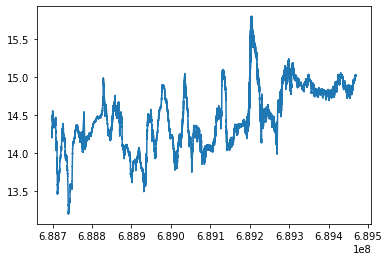

In [9]:
# Start with lat/lon/time and SST

plt.plot(ds.time_1Hz, ds.UCTD_sea_water_temperature)

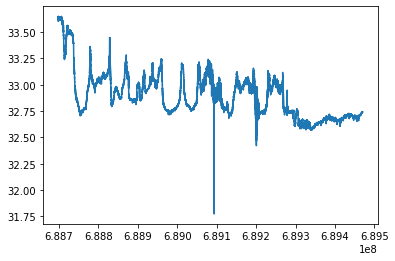

In [10]:
plt.plot(ds.time_1Hz, ds.UCTD_salinity)

(-124.16746734583333,
 -123.44502923750001,
 36.84628074166667,
 37.58073809166667)

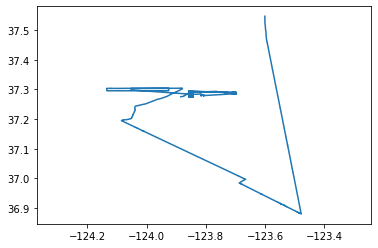

In [11]:
plt.plot(ds.longitude_1Hz, ds.latitude_1Hz)
plt.axis('equal')

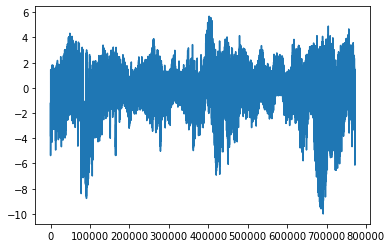

In [12]:
plt.plot(ds.Workhorse_altitude)

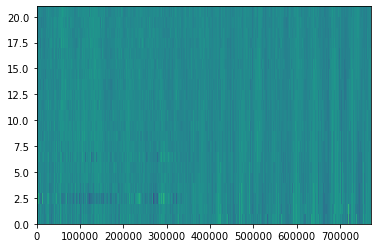

In [13]:
plt.pcolor(ds.Workhorse_vel_east.transpose())

## Let's try extracting data for bulk fluxes

Will need:  
- lat/lon (1 Hz and 20 Hz)
- SMP21/SGR4 data
- wind (u,v,w)
- all WXT variables
- SST, SSS, sensor depth ("UCTD")

1 Hz variables I need:
- time_1Hz
- latitude_1Hz
- longitude_1Hz
- UCTD_sea_water_temperature
- UCTD_salinity
- UCTD_density
- UCTD_depth
- WXT_rainfall_rate
- WXT_atmospheric_pressure
- WXT_air_temperature
- WXT_relative_humidity
- WXT_wind_speed
- WXT_wind_direction
- SMP21_shortwave_flux
- SGR4_longwave_flux
- _also need some estimate of surface current_

20 Hz variables I need:
- time_20Hz
- latitude_20Hz
- longitude_20Hz
- wind_speed
- wind_direction
- wind_vertical

Not sure if I need:  
- time_15min
- wave_frequency


In [15]:
ds.coords

Coordinates:
  * time_1Hz             (time_1Hz) float64 6.887e+08 6.887e+08 ... 6.895e+08
    latitude_1Hz         (time_1Hz) float64 37.55 37.55 37.55 ... 37.28 37.28
    longitude_1Hz        (time_1Hz) float64 -123.6 -123.6 ... -123.9 -123.9
  * time_10Hz            (time_10Hz) float64 6.887e+08 6.887e+08 ... 6.895e+08
    altitude_10Hz        (time_10Hz) float32 ...
  * time_15min           (time_15min) float64 6.887e+08 6.887e+08 ... 6.895e+08
  * wave_frequency       (wave_frequency) float32 0.04 0.045 0.05 ... 0.795 0.8
  * time_20Hz            (time_20Hz) float64 6.887e+08 6.887e+08 ... 6.895e+08
    latitude_20Hz        (time_20Hz) float64 ...
    longitude_20Hz       (time_20Hz) float64 ...
    altitude_20Hz        (time_20Hz) float32 ...
  * Workhorse_time       (Workhorse_time) float64 6.887e+08 ... 6.895e+08
  * Workhorse_range      (Workhorse_range) float32 3.93 5.93 ... 41.93 43.93
    Workhorse_latitude   (Workhorse_time) float64 ...
    Workhorse_longitude  (Workhorse_

In [73]:
var_list[37]

'wind_vertical'

In [78]:
vars_to_drop = var_list[38:-1]
# vars_to_drop

In [76]:
# Maybe the easiest way to create a subset of the variables is to only load a subset of the variables

ds3 = xr.open_dataset(file, decode_times = False, engine = 'netcdf4', drop_variables = vars_to_drop)

In [90]:
new_file = path+WG+'_L2b_met.nc'
print ('saving to ', new_file)
ds3.to_netcdf(path=new_file)
ds3.close()
print ('finished saving')

saving to  /mnt/e/SMODE_data/pilot/WG/L2/WHOI43_L2b_met.nc
finished saving


In [84]:
ds3.nbytes/10**9

13.333942712

In [ ]:
# Raw met plot from WG:

plt.subplot(4,1,1)
